<a id='back'>
</a>

**Table of contents:**
* [How the data was scrapped](#db)
* [About](#about)
*  [Importing necessary libraries](#library)
*  [Connecting to the Database](#database)
*  [Querries](#querry)
*  * [Companies that frequently post internships on internshala.](#q1)
*  * [Popular Positions](#q2)
*  * [What Skills are required for Business Development (Sales)?](#q3)
*  * [Popular Locations.](#q4)
*  * [Popular Positions by Location.](#q5)
*  * [How much are these Positions getting Paid? (Using subquerry)](#q6)
*  * [Which companies use internshala to host Volunteering/Unpaid Internships?](#q7)
*  * [Which roles are highly popular for Companies to recruit as interns?](#q8)
*  * [How many months is most common?](#q9)
*  * [Most common Perks offered by Companies while posting Internships](#q10)
*  * [How frequently do companies post internships on Internshala?](#q11)
*  * [Frequent Words used by companies to describe themselfs.](#q12)
*  * [Frequent Words used by companies as Responsibilities.](#q13)
*  * [Frequent Words used by companies for who can apply to the internship.](#q14)

![Internshala](https://internshala.com/static/images/common/internshala_logo.png)

<a id='db'>
    <h3>How the data was scrapped</h3>
</a>

1. The data was scrapped in `Python` using `BeautifulSoup` as the primary source for extracting information from the webpage. 
 
2. `request_html` as the primary source for paganation.

3. `sqlite3` for creating and inserting information into the database and last but not the least `requests` library for extracting source of the links.

The database insists of scraping over 100 pages and each page having 40 internship opportuinities. The code can be found [here.](https://github.com/l3r4nd/Internshala-Webscraper/blob/master/Internshala.py) The Analysis of the database contains in this notebook below.

<a id='about'/>

* <h2>About:</h2>
</a>
**Internshala** is a a business market where Companies around India post/host their Internship opportunities for Students. Where students learn the ways of business and applying their core skills to solove problems.

> At the core of the idea is the belief that internships, if managed well, can make a positive difference to the student, to the employer, and to the society at large. Hence, the ad-hoc culture surrounding internships in India should and would change. Internshala aims to be the driver of this change.

Internshala tries to solve these problems:

* For million plus students struggling to get a meaningful internship every year, Internshala is a friend, a mentor, an affectionate senior, and a boon.
* For thousands of organizations that use Internshala to hire interns, we are a pleasant surprise, a benchmark of the world standards in customer service.
* For outsiders (a chance visitor, media, investors, friends and acquaintances) Internshala is the next big thing coming out of India’s start up stable.
* But internally, we are a bunch of entrepreneurs trying to solve a very hard problem – the (near)failure of India’s education system.

<a id='library'>
    
* <h2>Importing necessary libraries</h2>
</a>

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import datetime as dt

import codecs
from wordcloud import STOPWORDS, WordCloud
import base64
import requests
import cv2

<a id='database'>

* <h2>Connecting to the Database</h2>
</a>

> The database conists of over **100** pages scrapped using Python.

In [24]:
conn = sqlite3.connect("INTERNSHALA.db")
c = conn.cursor()

<h3>The Database consists of 15 fields scrapped from the Internshala website for Analysis. These fields are:</h3>

* Company name
* Position
* Location
* Start date
* Duration
* Stipend
* Posted on
* Apply by
* Rewards and incentives
* About
* Responsibilities
* Who can appy
* Perks
* No of iterns(required)
* Skills

*in order.*

<a id='querry'>
    
* <h2>Querries:</h2>
</a>

In [3]:
def get_querry(querry):
    return pd.read_sql(sql = querry, con = conn)

In [4]:
querry = """
    SELECT DISTINCT(Company_name)
    FROM Internshala
"""
print("There are about {} many unique companies in the Database.".format(len(get_querry(querry))))

There are about 2339 many unique companies in the Database.


<a id='q1'>

* * <h3>Companies that frequently post internships on internshala</h3>
</a>

In [5]:
querry = """
    SELECT Company_name, COUNT(Company_name) AS COUNT
    FROM Internshala
    GROUP BY Company_name
    ORDER BY COUNT DESC
"""
get_querry(querry).head()

,Company_name,COUNT
0,Opulence Business Solutions Private Limited,29
1,Hvantage Technologies Incorporated,17
2,FT Broadcast,16
3,Startups Club Services Private Limited,16
4,Yes Property,16


In [6]:
def plot_bar(df, title, palette = None, rotation = 90):
    plt.figure(figsize = [10,3])
    columns = df.columns
    if palette != None:
        cm = sns.color_palette(palette = palette, n_colors = 10)[::-1]
        ax = sns.barplot(x = df[columns[0]][::-1], y = df[columns[1]][::-1], palette = cm)
        ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = rotation)
        for index, count in enumerate(df[columns[1]][::-1]):
            ax.text(index, count, s = count, ha = 'center', size = 13)
        ax.set_title(title)
    else:
        ax = sns.barplot(x = df[columns[0]][::-1], y = df[columns[1]][::-1])
        ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = rotation)
        for index, count in enumerate(df[columns[1]][::-1]):
            ax.text(index, count, s = count, ha = 'center', size = 13)
        ax.set_title(title)

<a id='q2'>

* * <h3>Popular Positions:</h3>
</a>

In [7]:
querry = """
    SELECT Position, COUNT(Position) AS Position_Count
    FROM Internshala
    GROUP BY Position
    ORDER BY Position_Count DESC
    LIMIT 10
"""
df = get_querry(querry)

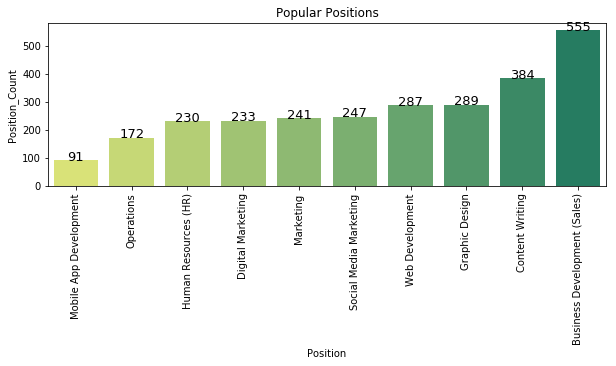

In [8]:
plot_bar(df, 'Popular Positions', palette = 'summer')

* Businees Development seems to be the most popular choice for companies in India to make the interns understand and develop their skills in *Sales* area followed by Content Writing.
* Out of these 10 Top Positions 4 are in marketing domain, 2 in designing, 2 in programming and the rest in internal management. 

<a id='q3'>

* * <h3>What Skills are required for Business Development (Sales)?</h3>
</a>

In [9]:
querry = """
    SELECT MAX(Skills) AS Skills
    FROM Internshala
    WHERE Position == 'Business Development (Sales)'
"""
df = get_querry(querry)
''.join(re.sub('\([^)]*\)', '', df['Skills'][0])).strip()

'Social Media Marketing , Salesforce and English Proficiency'

* These are the most common skills required by Business Development.

<a id='q4'>

* * <h3>Popular Locations</h3>
</a>

<Figure size 720x216 with 0 Axes>

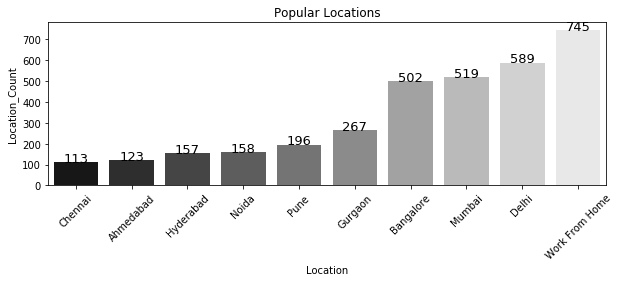

In [10]:
querry = """
    SELECT DISTINCT(Location), COUNT(Location) AS Location_Count
    FROM Internshala
    GROUP BY Location
    ORDER BY Location_Count DESC
    LIMIT 10
"""
df = get_querry(querry)
plt.figure(figsize = [10,3])
plot_bar(df, 'Popular Locations', palette = 'gist_yarg', rotation = 45)

* *Work From Home* seems to be the most likely choice of interns as well as companies, however does *Work From Home* help improve the experience gained by doing these internships?
* *Bangalore*, *Delhi*, *Mumbai* seems very close to each other in terms of internships.
* *Gurgaon* being where the heart of Internshala resides does not have quantity of internships.

<a id='q5'>

* * <h3>Popular Positions by Location</h3>
</a>

In [11]:
querry = """
    SELECT DISTINCT(Location), Position, COUNT(Position) AS Position_Count
    FROM Internshala
    GROUP BY Location, Position
    ORDER BY Position_Count DESC
    LIMIT 5
"""
df = get_querry(querry)
df.style.background_gradient(cmap = 'tab20c')

,Location,Position,Position_Count
0,Work From Home,Content Writing,144
1,Delhi,Business Development (Sales),96
2,Work From Home,Social Media Marketing,74
3,Mumbai,Business Development (Sales),67
4,Bangalore,Business Development (Sales),61


* As we can clearly see *Business Development* being asked in many locations these kinds of Positions are not in *Work From Home*.
* *Content Writing* tops the popular positions by location mark being a *Work From Home* followed by *Delhi*, *Mumbai* and *Bangalore*.

<a id='q6'>

* * <h3>How much are these Positions getting Paid? (Using subquerry)</h3>
</a>

In [12]:
querry = """
    SELECT Sub.Position, Sub.Stipend
    FROM (
        SELECT Position, COUNT(Position) AS Position_Count, Stipend
        FROM Internshala
        GROUP BY Position
        HAVING Duration > '3 Months'
        ORDER BY Position_Count DESC
        LIMIT 5
    ) Sub
"""

df = get_querry(querry)
stipend = ', '.join(df['Stipend'].apply(lambda x: str('₹') + ''.join(re.findall('[\d+]|[\d+\-\d+]', x))))
print("Positions that require interns for longer than 3 Months are {} with their Stipend being {} respectively.".format(', '.join(df['Position']), stipend))

Positions that require interns for longer than 3 Months are Business Development (Sales), Mobile App Development, Accounts, Finance, Telecalling with their Stipend being ₹8000, ₹20000, ₹, ₹2000+, ₹3000-6000 respectively.


<a id='q7'>

* * <h3>Which companies use internshala to host Volunteering/Unpaid Internships?</h3>
</a>

In [13]:
querry = """
    SELECT Company_name, Count(Company_name) AS Company_Count
    FROM Internshala
    GROUP BY Company_name
    HAVING Stipend LIKE 'Unpaid%'
    ORDER BY Company_Count DESC
    LIMIT 5
"""
df = get_querry(querry)
df

,Company_name,Company_Count
0,Aam Aadmi Party,10
1,Criotam Technologies Private Limited,9
2,Teach For India,9
3,The Rising People Welfare Society,8
4,CSIR-CDRI,5


<a id='q8'>

* * <h3>Which roles are highly popular for Companies to recruit as interns?</h3>
</a>

In [14]:
querry = """
    SELECT Company_name, No_of_interns, Stipend, Position
    FROM Internshala
    WHERE No_of_interns > 500
"""
df = get_querry(querry)
df

,Company_name,No_of_interns,Stipend,Position
0,Ranbhoomi IIM-Indore,1000.0,Performance Based ...,Campus Ambassador
1,E-Summit IIT Roorkee,1000.0,Performance Based ...,Campus Ambassador
2,"Megalith, IIT Kharagpur",999.0,Performance Based ...,Campus Ambassador
3,IARC | Centre For United Nations,800.0,Performance Based ...,Campus Ambassador
4,INDIA Redefined,999.0,Unpaid \n ...,Volunteering (999 Volunteers required)
5,AGNI RURAL WELFARE SOCIETY,999.0,Unpaid \n ...,Marketing (999 interns required)


* The above table shows that over 1000 interns are required as *Campus Ambassador* while their *Stipend* being a Performance Based to improve and grow growth at an unsteady pace.

<a id='q9'>

* * <h3>How many months is most common?</h3>
</a>

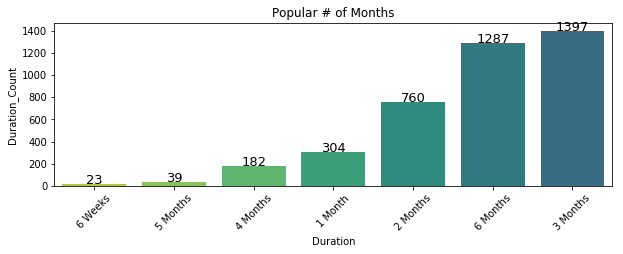

In [15]:
querry = """
    SELECT Duration, COUNT(Duration) AS Duration_Count
    FROM Internshala
    GROUP BY Duration
    ORDER BY Duration_Count DESC
    LIMIT 7
"""
df = get_querry(querry)
plot_bar(df, 'Popular # of Months', palette = 'viridis', rotation = 45)

<a id='q10'>

* * <h3>Most common Perks offered by Companies while posting Internships</h3>

</a>

In [16]:
querry = """
    SELECT DISTINCT(Perks)
    FROM Internshala
    LIMIT 10
"""
df = get_querry(querry)
for n, row in enumerate(df['Perks']):
    perks = re.sub('\n', '', row.strip())
    print(str(str(n) +'.'), perks)

0. Certificate.
1. A small tip - A detailed and well-written application increases the chances to get shortlisted for the internship so please make sure that while applying for the internship, you read all the questions well and write detailed & error-free answers to the questions. To get shortlisted for the Proofreading & Client Interaction internship, don't forget to proofread your own application before submitting!
2. Certificate, Flexible work hours.
3. If you're someone who enjoys serving and helping others, has a strong sense of empathy, and loves interacting with people, then we'd love to have you here.
4. Candidates with excellent verbal and written communications skillsCandidates with strong listening and presentation skillsCandidates with the ability to multi-task, prioritize, and manage time effectively
5. Certificate, 5 days a week.
6. Certificate, Letter of recommendation, Flexible work hours, 5 days a week.
7. Certificate, 5 days a week, Free snacks & beverages.
8. Certif

<a id='q11'>

<h2>How frequently do companies post internships on Internshala?</h2>
</a>

In [17]:
querry1 = """
    SELECT Posted_on, COUNT(Posted_on) AS Posted_on_Count
    FROM Internshala
    GROUP BY Posted_on
    ORDER BY Posted_on_Count DESC
    LIMIT 5
"""

querry2 = """
    SELECT Apply_by, COUNT(Apply_by) AS Apply_by_Count
    FROM Internshala
    GROUP BY Apply_by
    ORDER BY Apply_by_Count DESC
    LIMIT 5
"""

querry3 = """
    SELECT Posted_on, Apply_by
    FROM Internshala
"""

df1 = get_querry(querry1)
df2 = get_querry(querry2)

df = get_querry(querry3)
df['Posted_on'] = pd.to_datetime(df['Posted_on'], dayfirst = True)
df['Apply_by'] = df['Apply_by'].apply(lambda x: None if x == 'Not Provided' else x)
df['Apply_by'] = pd.to_datetime(df['Apply_by'], dayfirst = True)
diff = df['Apply_by'] - df['Posted_on']
diff = diff.value_counts()[:10]

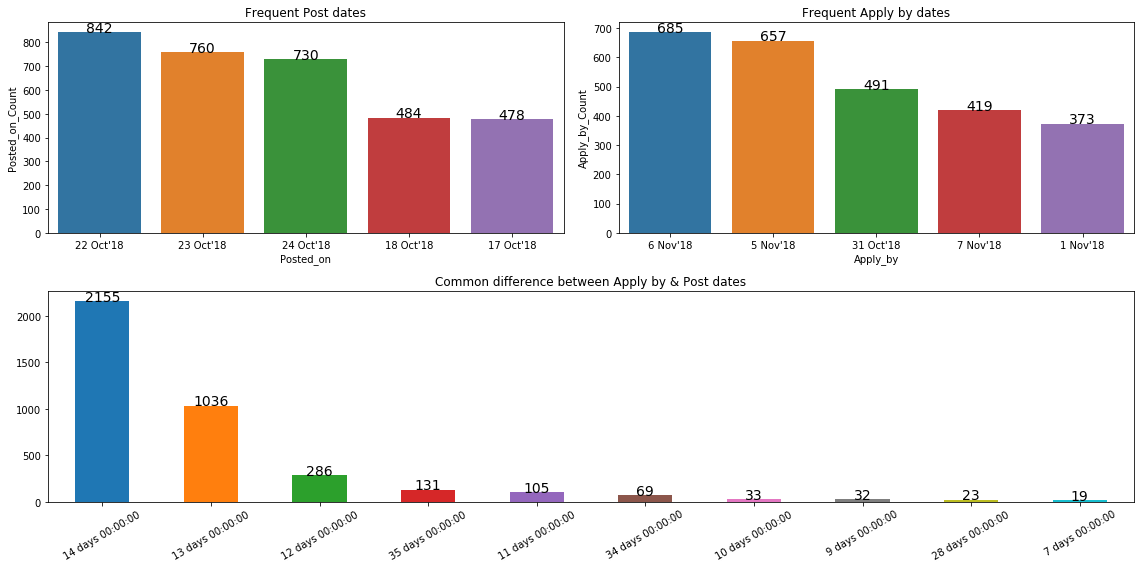

In [18]:
gs = GridSpec(2, 2, figure = plt.figure(figsize = (16, 8)))
ax = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, :])
ax.set_title('Frequent Post dates')
ax1.set_title('Frequent Apply by dates')
ax2.set_title('Common difference between Apply by & Post dates')

def plot_text(values, a):
    for index, value in enumerate(values):
        a.text(index, value, value, size = 14, ha = 'center')

g1 = sns.barplot(df1['Posted_on'], df1['Posted_on_Count'], ax = ax)
plot_text(df1['Posted_on_Count'], ax)

g2 = sns.barplot(df2['Apply_by'], df2['Apply_by_Count'], ax = ax1)
plot_text(df2['Apply_by_Count'], ax1)

diff.plot(kind = 'bar', ax = ax2)
g3 = ax2.set_xticklabels(labels = ax2.get_xticklabels(), rotation = 30)
plot_text(diff.values, ax2)
plt.tight_layout()

* The plot above indicates that most common(frequent) are in mid of October which ends at start of the next month.
* Most often the difference between span of internships is 2 weeks(14 days)

In [19]:
def create_wordcloud(words, mask_link = None):
    Stopwords = set(STOPWORDS)
    if mask_link != None:
        mask_link = mask_link
        img = base64.b64encode(requests.get(mask_link).content)
        name = mask_link.split('/')[-1].split('.')[0]
        f1 = open(name + '.jpg', 'wb')
        f1.write(codecs.decode(img, 'base64'))
        f1.close()

        Img = cv2.imread(name + '.jpg')

        wc = WordCloud(background_color = 'black', max_words = 10000, 
                       mask = Img, stopwords = Stopwords, max_font_size = 40, random_state = 7)

        plt.figure(figsize = [18,6])
        wc.generate(words)
        plt.imshow(wc.recolor(colormap = 'tab20c' , random_state = 16), alpha = 1, interpolation = 'bilinear')
        plt.axis('off')
    else:
        wc = WordCloud(background_color = 'black', max_words = 10000,
                      stopwords = Stopwords, max_font_size = 40, random_state = 7)
        plt.figure(figsize = [18, 6])
        wc.generate(words)
        plt.imshow(wc.recolor(colormap = 'gist_ncar', random_state = 16), alpha = 0.8, interpolation = 'bilinear',)
        plt.axis('off')

<a id='q12'>

* * <h3>Frequent Words used by companies to describe themselfs</h3>
</a>

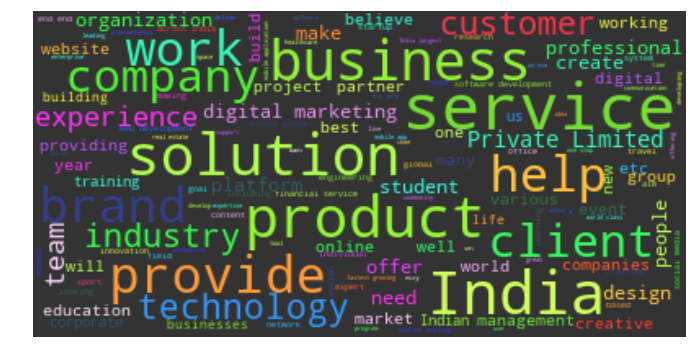

In [20]:
querry = """
    SELECT About
    FROM Internshala
"""
df = get_querry(querry)
df = df['About'].apply(lambda x: x.strip())
words = ' '.join(df)
create_wordcloud(words)

<a id='q13'>

* * <h3>Frequent Words used by companies as Responsibilities</h3>
</a>

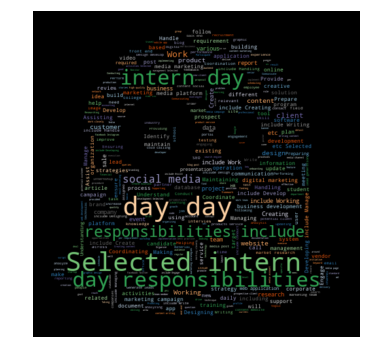

In [21]:
querry = """
    SELECT Responsibilites
    FROM Internshala
"""
df = get_querry(querry)
df = df['Responsibilites'].apply(lambda x: x.strip())
words = ' '.join(df)

create_wordcloud(words, "http://www.tekkne.com.mx/images/monster.png")

<a id='q14'>

* * <h3>Frequent Words used by companies for who can apply to the internship</h3>
</a>

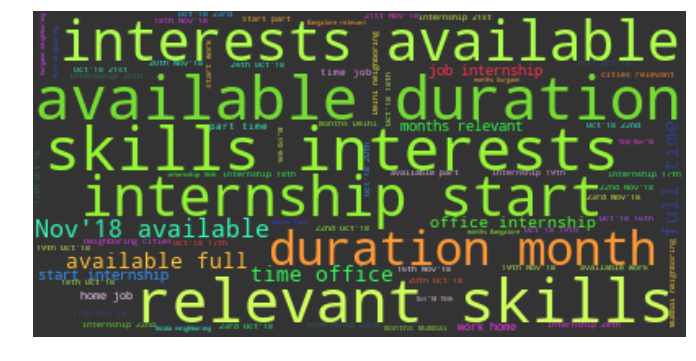

In [22]:
querry = """
    SELECT Who_can_apply
    FROM Internshala
"""
df = get_querry(querry)
df = df['Who_can_apply'].apply(lambda x: x.strip())
words = ' '.join(df)
create_wordcloud(words)

[back to top](#back)